## Comparison of Predicted and Manual Adherence Scores

This notebook compares the predicted adherence scores from the model with the manually labeled adherence scores.

I have used two pre-trained models: **EfficientNet**, **ResNet**

###  **Analysis for EfficientNet model**

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Redefine the dataframes from the uploaded files
file_path_predicted = '/Users/rachelwang/Downloads/notes/models/csv/predicted_adherence_label_empty.csv'
file_path_manual = '/Users/rachelwang/Downloads/notes/models/csv/adherence_labeled_with_image.csv'

df_predicted = pd.read_csv(file_path_predicted)
df_manual = pd.read_csv(file_path_manual)

# Merge the dataframes on 'pid' and 'task' columns
df_merged = pd.merge(df_predicted, df_manual, on=['pid', 'task'], suffixes=('_predicted', '_manual'))
df_merged.head()

,pid,task,adherence_predicted,file_predicted,spectrogram_predicted,adherence_manual,file_manual,spectrogram_manual
0,1f9475bb-f13b-4f68-969b-28f20455b3e7,Loudness,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
1,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-Breath-2,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-FiveBreaths-1,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
3,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-ThreeQuickBreaths-2,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,4.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Maximum-phonation-time-1,3,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...


In [17]:
# Calculate the accuracy
correct_predictions = (df_merged['adherence_manual'] == df_merged['adherence_predicted']).sum()
total_predictions = len(df_merged)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 65.06%


### Scatter Plot

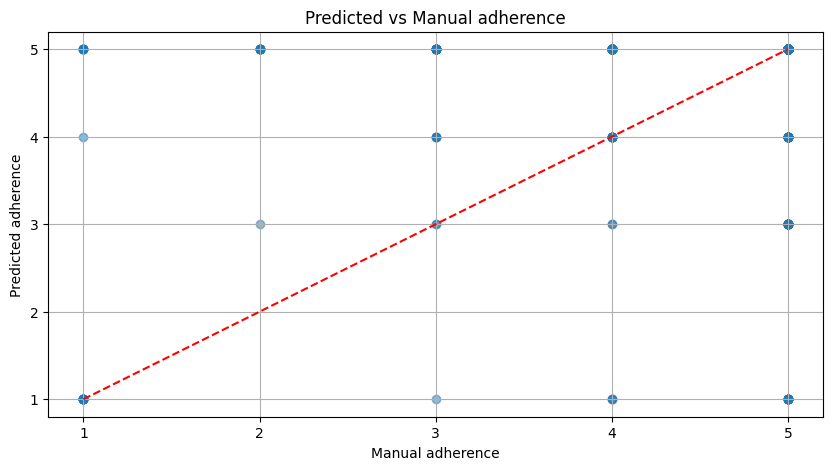

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs manual adherence
plt.figure(figsize=(10, 5))
plt.scatter(df_merged['adherence_manual'], df_merged['adherence_predicted'], alpha=0.5)
plt.plot([df_merged['adherence_manual'].min(), df_merged['adherence_manual'].max()], 
         [df_merged['adherence_manual'].min(), df_merged['adherence_manual'].max()], 
         color='red', linestyle='--')
plt.xlabel('Manual adherence')
plt.ylabel('Predicted adherence')
plt.title('Predicted vs Manual adherence')
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

- The scatter plot shows the relationship between the predicted adherence scores and the manually labeled adherence scores.
- The red dashed line represents the line of perfect agreement where predicted scores would exactly match the manual scores.
-  Many points lie along the line of perfect agreement, indicating instances where the predicted scores match the manual scores.
- There is a noticeable spread around the line, especially at lower adherence scores, suggesting discrepancies between the model’s predictions and manual labels.

### Histogram

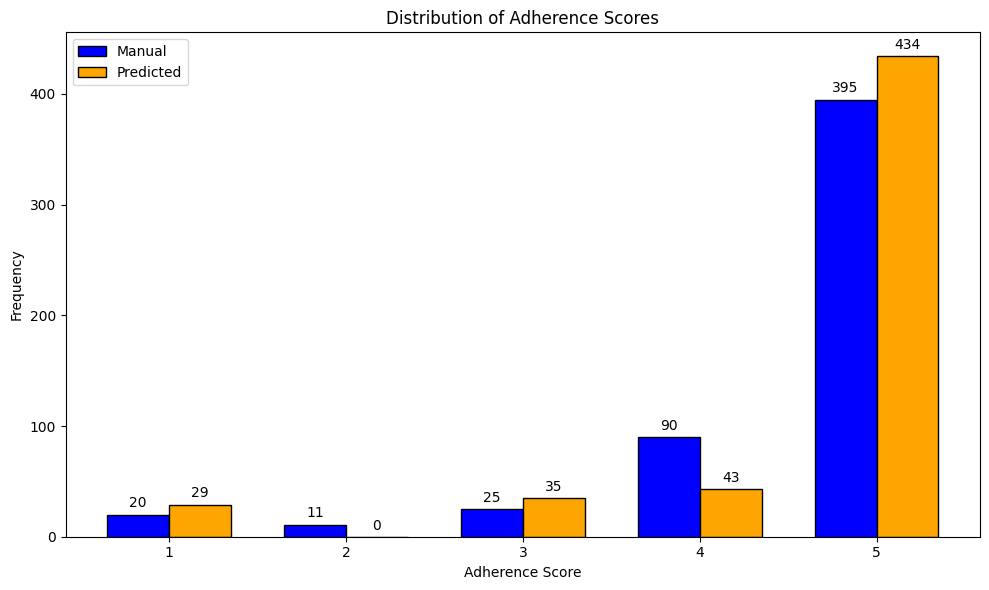

In [19]:
import numpy as np

# Ensure all adherence scores are included, even if they have zero counts
labels = [1, 2, 3, 4, 5]
manual_counts = df_merged['adherence_manual'].value_counts().reindex(labels, fill_value=0).sort_index()
predicted_counts = df_merged['adherence_predicted'].value_counts().reindex(labels, fill_value=0).sort_index()

# Create positions for the bars
x = np.arange(len(labels))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, manual_counts, width, label='Manual', color='blue', edgecolor='black')
bars2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted', color='orange', edgecolor='black')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Adherence Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Adherence Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

fig.tight_layout()

plt.show()

- Both distributions show that the majority of scores are clustered around the highest value (5.0).
- The predicted scores appear to be slightly more concentrated at the highest value compared to the manual scores.
- There are some discrepancies at lower adherence scores where the predicted scores show more instances of lower values compared to manual scores.

### Statistical Comparison

In [20]:
# Calculate comparison statistics
comparison_stats = df_merged[['adherence_manual', 'adherence_predicted']].describe()
comparison_stats['correlation'] = df_merged[['adherence_manual', 'adherence_predicted']].corr().iloc[0, 1]
comparison_stats

,adherence_manual,adherence_predicted,correlation
count,541.000000,541.000000,0.282772
mean,4.532348,4.576710,0.282772
std,0.953244,1.009278,0.282772
min,1.000000,1.000000,0.282772
25%,4.000000,5.000000,0.282772
50%,5.000000,5.000000,0.282772
75%,5.000000,5.000000,0.282772
max,5.000000,5.000000,0.282772


- Correlation: The correlation coefficient between the predicted and manual adherence scores is approximately 0.283. This indicates a weak positive relationship, suggesting that while there is some alignment between the model’s predictions and manual labels, it is not very strong.

### Confusion Matrix

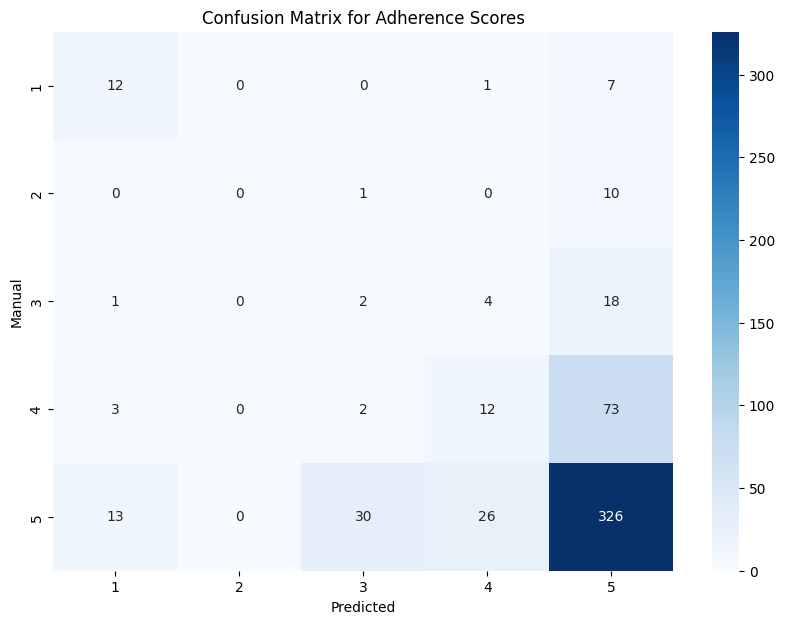

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(df_merged['adherence_manual'], df_merged['adherence_predicted'], labels=[1, 2, 3, 4, 5])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Manual')
plt.title('Confusion Matrix for Adherence Scores')
plt.show()

### **Analysis for ResNet model**

In [42]:
file_path_predicted = '/Users/rachelwang/Downloads/notes/models/csv/predicted_adherence_label_empty_1.csv'
file_path_manual = '/Users/rachelwang/Downloads/notes/models/csv/adherence_labeled_with_image.csv'

In [43]:
df_predicted = pd.read_csv(file_path_predicted)
df_manual = pd.read_csv(file_path_manual)

# Merge the dataframes on 'pid' and 'task' columns
df_merged = pd.merge(df_predicted, df_manual, on=['pid', 'task'], suffixes=('_predicted', '_manual'))
df_merged.head()

,pid,task,adherence_predicted,file_predicted,spectrogram_predicted,adherence_manual,file_manual,spectrogram_manual
0,1f9475bb-f13b-4f68-969b-28f20455b3e7,Loudness,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
1,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-Breath-2,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-FiveBreaths-1,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
3,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-ThreeQuickBreaths-2,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,4.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Maximum-phonation-time-1,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...


In [44]:
# Calculate the accuracy
correct_predictions = (df_merged['adherence_manual'] == df_merged['adherence_predicted']).sum()
total_predictions = len(df_merged)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 75.23%


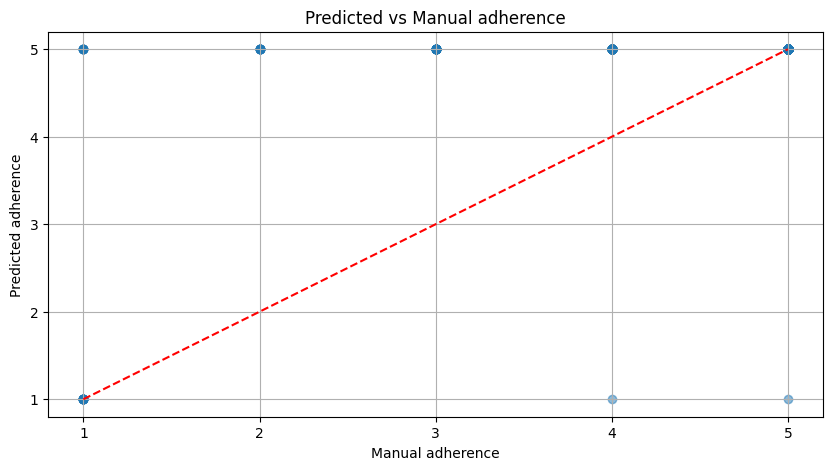

In [45]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs manual adherence
plt.figure(figsize=(10, 5))
plt.scatter(df_merged['adherence_manual'], df_merged['adherence_predicted'], alpha=0.5)
plt.plot([df_merged['adherence_manual'].min(), df_merged['adherence_manual'].max()], 
         [df_merged['adherence_manual'].min(), df_merged['adherence_manual'].max()], 
         color='red', linestyle='--')
plt.xlabel('Manual adherence')
plt.ylabel('Predicted adherence')
plt.title('Predicted vs Manual adherence')
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

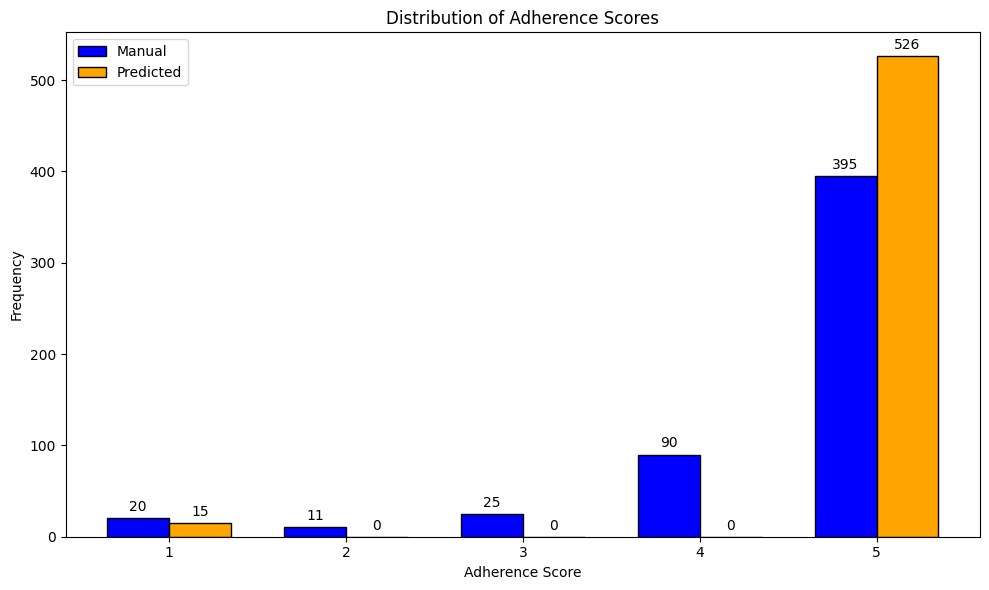

In [46]:
import numpy as np

# Ensure all adherence scores are included, even if they have zero counts
labels = [1, 2, 3, 4, 5]
manual_counts = df_merged['adherence_manual'].value_counts().reindex(labels, fill_value=0).sort_index()
predicted_counts = df_merged['adherence_predicted'].value_counts().reindex(labels, fill_value=0).sort_index()

# Create positions for the bars
x = np.arange(len(labels))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, manual_counts, width, label='Manual', color='blue', edgecolor='black')
bars2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted', color='orange', edgecolor='black')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Adherence Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Adherence Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

fig.tight_layout()

plt.show()

In [47]:
# Calculate comparison statistics
comparison_stats = df_merged[['adherence_manual', 'adherence_predicted']].describe()
comparison_stats['correlation'] = df_merged[['adherence_manual', 'adherence_predicted']].corr().iloc[0, 1]
comparison_stats

,adherence_manual,adherence_predicted,correlation
count,541.000000,541.000000,0.543597
mean,4.532348,4.889094,0.543597
std,0.953244,0.657360,0.543597
min,1.000000,1.000000,0.543597
25%,4.000000,5.000000,0.543597
50%,5.000000,5.000000,0.543597
75%,5.000000,5.000000,0.543597
max,5.000000,5.000000,0.543597


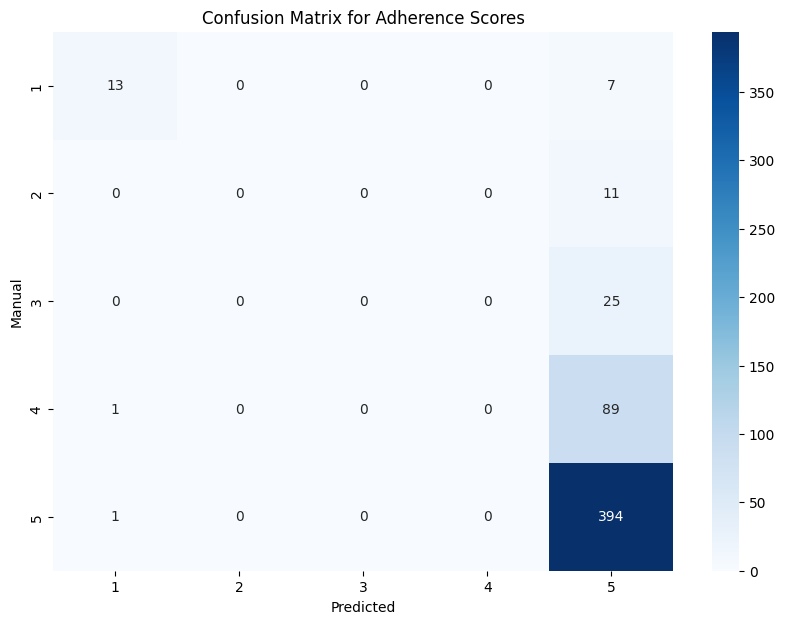

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(df_merged['adherence_manual'], df_merged['adherence_predicted'], labels=[1, 2, 3, 4, 5])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Manual')
plt.title('Confusion Matrix for Adherence Scores')
plt.show()

Since EfficientNet model shows a weak positive correlation and the model’s accuracy indicates a need for further improvement to increase reliability. I implemented cross-validation to ensure that the model generalizes well to unseen data and improves robustness.

### **EfficientNet with Cross-Validation**

In [49]:
file_path_predicted = '/Users/rachelwang/Downloads/notes/models/csv/predicted_adherence_label_empty_2.csv'
file_path_manual = '/Users/rachelwang/Downloads/notes/models/csv/adherence_labeled_with_image.csv'

In [50]:
df_predicted = pd.read_csv(file_path_predicted)
df_manual = pd.read_csv(file_path_manual)

# Merge the dataframes on 'pid' and 'task' columns
df_merged = pd.merge(df_predicted, df_manual, on=['pid', 'task'], suffixes=('_predicted', '_manual'))
df_merged.head()

,pid,task,adherence_predicted,file_predicted,spectrogram_predicted,adherence_manual,file_manual,spectrogram_manual
0,1f9475bb-f13b-4f68-969b-28f20455b3e7,Loudness,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
1,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-Breath-2,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
2,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-FiveBreaths-1,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
3,1f9475bb-f13b-4f68-969b-28f20455b3e7,Respiration-and-cough-ThreeQuickBreaths-2,4,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,4.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...
4,1f9475bb-f13b-4f68-969b-28f20455b3e7,Maximum-phonation-time-1,5,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...,5.0,/Users/rachelwang/Downloads/bids_with_sensitiv...,/Users/rachelwang/Downloads/notes/models/adher...


In [51]:
# Calculate the accuracy
correct_predictions = (df_merged['adherence_manual'] == df_merged['adherence_predicted']).sum()
total_predictions = len(df_merged)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 91.50%


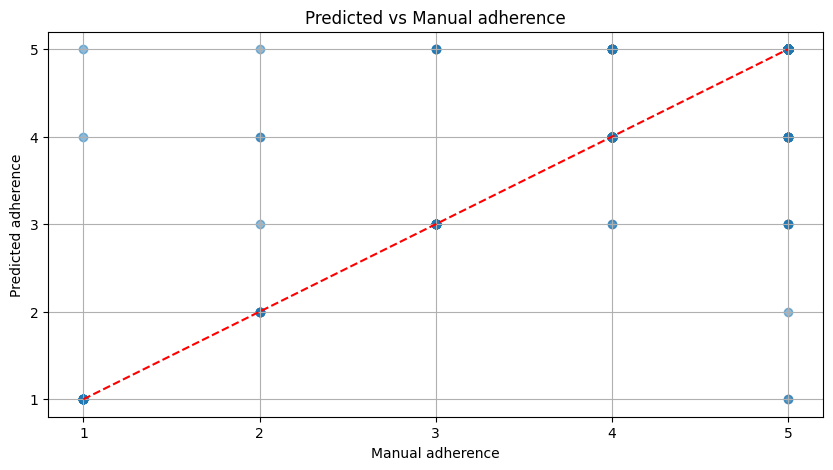

In [52]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs manual adherence
plt.figure(figsize=(10, 5))
plt.scatter(df_merged['adherence_manual'], df_merged['adherence_predicted'], alpha=0.5)
plt.plot([df_merged['adherence_manual'].min(), df_merged['adherence_manual'].max()], 
         [df_merged['adherence_manual'].min(), df_merged['adherence_manual'].max()], 
         color='red', linestyle='--')
plt.xlabel('Manual adherence')
plt.ylabel('Predicted adherence')
plt.title('Predicted vs Manual adherence')
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

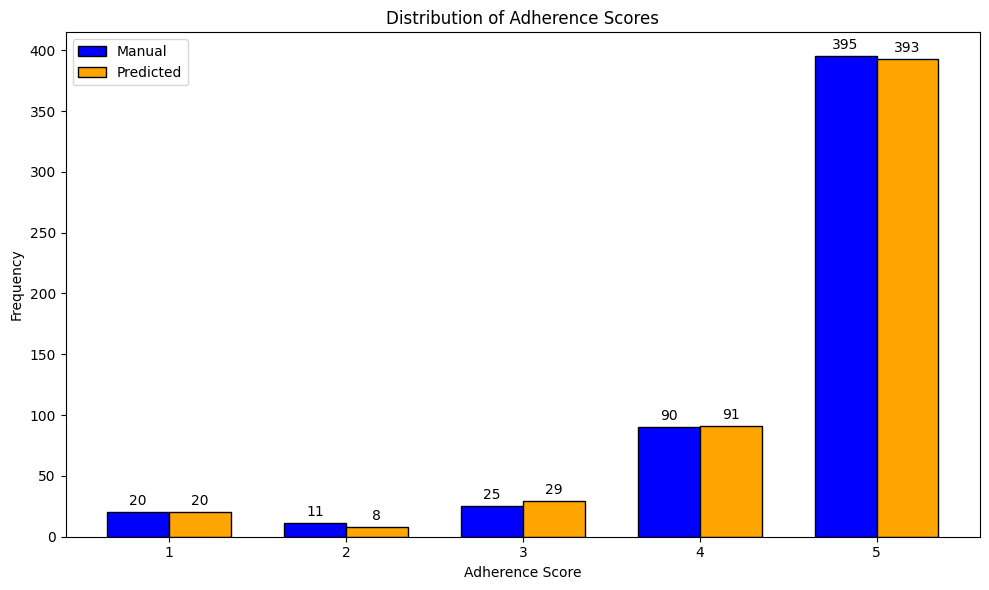

In [53]:
import numpy as np

# Ensure all adherence scores are included, even if they have zero counts
labels = [1, 2, 3, 4, 5]
manual_counts = df_merged['adherence_manual'].value_counts().reindex(labels, fill_value=0).sort_index()
predicted_counts = df_merged['adherence_predicted'].value_counts().reindex(labels, fill_value=0).sort_index()

# Create positions for the bars
x = np.arange(len(labels))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, manual_counts, width, label='Manual', color='blue', edgecolor='black')
bars2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted', color='orange', edgecolor='black')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Adherence Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Adherence Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

fig.tight_layout()

plt.show()

In [54]:
# Calculate comparison statistics
comparison_stats = df_merged[['adherence_manual', 'adherence_predicted']].describe()
comparison_stats['correlation'] = df_merged[['adherence_manual', 'adherence_predicted']].corr().iloc[0, 1]
comparison_stats

,adherence_manual,adherence_predicted,correlation
count,541.000000,541.000000,0.847682
mean,4.532348,4.532348,0.847682
std,0.953244,0.943480,0.847682
min,1.000000,1.000000,0.847682
25%,4.000000,4.000000,0.847682
50%,5.000000,5.000000,0.847682
75%,5.000000,5.000000,0.847682
max,5.000000,5.000000,0.847682


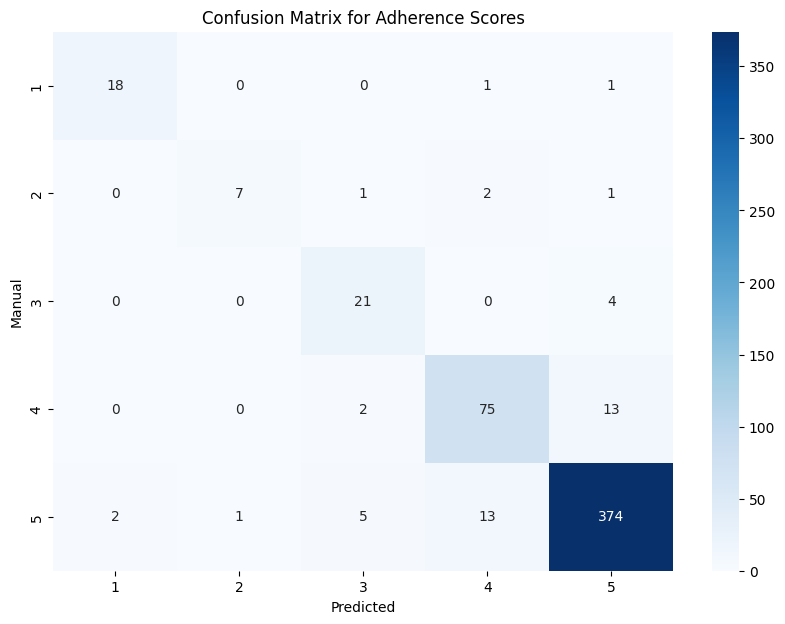

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(df_merged['adherence_manual'], df_merged['adherence_predicted'], labels=[1, 2, 3, 4, 5])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Manual')
plt.title('Confusion Matrix for Adherence Scores')
plt.show()

### Comprehensive Conclusion

After implementing and evaluating various models for predicting adherence scores, the following observations and conclusions can be drawn:

#### **EfficientNet Model (Initial Implementation)**
- **Accuracy**: 65.06%
- **Correlation**: 0.28
- **Observations**:
  - Weak positive correlation between manual and predicted adherence scores.
  - Model tended to over-predict the highest adherence level (score 5).
  - Significant room for improvement in prediction accuracy and reliability.

#### **ResNet Model**
- **Accuracy**: 75.23%
- **Correlation**: 0.54
- **Observations**:
  - Improved accuracy and correlation compared to the EfficientNet model.
  - Still exhibited a tendency to over-predict higher adherence levels, but with better alignment than EfficientNet.
  - Moderate positive correlation indicates better model performance.

#### **EfficientNet Model with Cross-Validation**
- **Accuracy**: 91.50%
- **Correlation**: 0.85
- **Observations**:
  - Significant improvement in both accuracy and correlation.
  - Strong positive correlation between manual and predicted adherence scores.
  - Predictions closely matched manual annotations across all adherence levels.
  - Minimal misclassifications, demonstrating high reliability and robustness of the model.

### Summary
- **Model Performance**: The implementation of cross-validation with the EfficientNet model resulted in a substantial increase in accuracy and correlation, indicating a well-generalized model with high predictive power.
- **Visual Analysis**:
  - Scatter plots, bar plots, and confusion matrices consistently showed improved alignment and reduced misclassifications with each subsequent model.
  - The final model (EfficientNet with cross-validation) demonstrated predictions that were tightly aligned with manual scores and had minimal discrepancies.